In [1]:
import matplotlib.pyplot as plt
import numpy as np
size_plot = 24 * 1

from utils import *

In [2]:
density_values, intgral_list, system_matrix_size = get_density_list()

CPU_single = load_cpu_stats_from_files("full_single", density_values, "full_time.txt")
CPU_multi = load_cpu_stats_from_files_multi("full_multi", density_values, "full_time.txt")
GPU_sortGPU = load_cpu_stats_from_files("GPU_full/storeGPU", density_values, "full_time.txt")
GPU_sortCPU = load_cpu_stats_from_files("GPU_full/storeCPU", density_values, "full_time.txt")

print(intgral_list)
print(CPU_single[0])
print(CPU_multi[0])
print(GPU_sortGPU[0])
print(GPU_sortCPU)

[ 764411904 1866240000 2732361984 3869835264 4804153344 5898240000]
[1257.17570423 3131.66714058 4391.09840095 6789.32308042 7732.31350909
 9632.62743759]
[130.1232245  292.71629497 423.57680215 587.59193395 720.41187449
 868.76535993]
[1.20802354 2.94283605 4.14082918 6.03086566 7.76703051 9.61039182]
(array([23.52950421, 48.36504798, 51.55795464, 65.30218327, 77.46152574,
       96.27579354]), array([22.01472064, 44.5576791 , 44.4744088 , 59.48656079, 72.42220584,
       86.07454705]), array([ 25.28920892,  54.32073744,  68.48744342,  74.03724128,
        90.79597615, 125.80681834]), array([0.80003452, 1.973858  , 5.86414673, 2.81468667, 3.82305739,
       6.71383815]))


C:\Users\Ian\AppData\Local\Temp\ipykernel_27792\2176319114.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


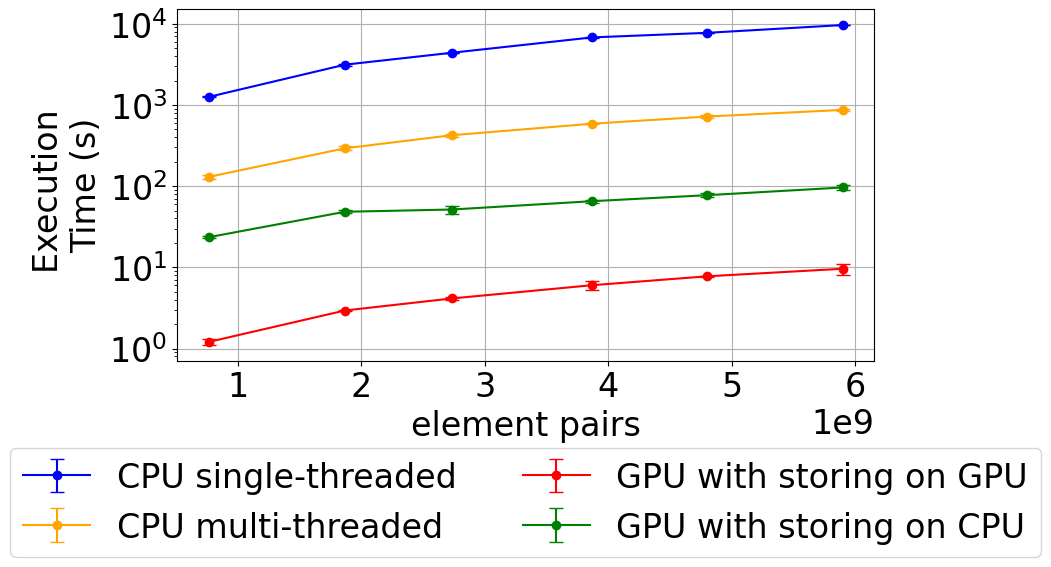

In [3]:



fig, ax = plt.subplots(figsize=(10, 6))

# Plot CPU with error bars
ax.errorbar(
    intgral_list, CPU_single[0], yerr=CPU_single[3],
    marker='o', label='CPU single-threaded', color='blue', capsize=5, linestyle='-'
)

# Plot GPU with error bars
ax.errorbar(
    intgral_list, CPU_multi[0], yerr=CPU_multi[3],
    marker='o', label='CPU multi-threaded', color='orange', capsize=5, linestyle='-'
)

ax.errorbar(
    intgral_list, GPU_sortGPU[0], yerr=GPU_sortGPU[3],
    marker='o', label='GPU with storing on GPU', color='red', capsize=5, linestyle='-'
)

ax.errorbar(
    intgral_list, GPU_sortCPU[0], yerr=GPU_sortCPU[3],
    marker='o', label='GPU with storing on CPU', color='green', capsize=5, linestyle='-'
)


ax.set_xlabel('element pairs', fontsize=size_plot)
ax.set_ylabel('Execution \nTime (s)', fontsize=size_plot)
# ax.set_title('Execution Time vs threads', fontsize=size_plot)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('log')

fig.canvas.draw()
offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# ax.legend(fontsize=size_plot)ax.legend(fontsize=size_plot, loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(fontsize=size_plot, loc='center left', bbox_to_anchor=(0.3, -1.0))
# Put legend below the plot inside figure area
ax.legend(
    fontsize=size_plot,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),  # centered below axis
    ncol=2,                        # spread labels into columns
    frameon=True
)

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/full_times.svg", format='svg')
plt.show()

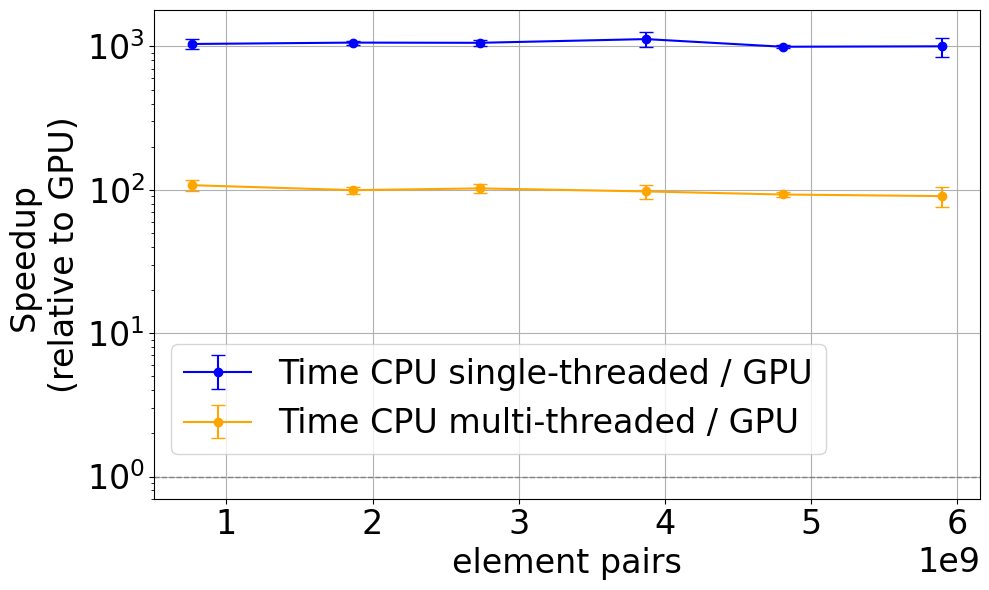

In [4]:
speedup_CPU_single_vs_GPU_sortGPU = np.array(CPU_single[0]) / np.array(GPU_sortGPU[0])
speedup_CPU_multi_vs_GPU_sortGPU = np.array(CPU_multi[0]) / np.array(GPU_sortGPU[0])
speedup_CPU_single_vs_GPU_sortCPU = np.array(CPU_single[0]) / np.array(GPU_sortCPU[0])
speedup_CPU_multi_vs_GPU_sortCPU = np.array(CPU_multi[0]) / np.array(GPU_sortCPU[0])


# Error propagation
error_CPU_single_vs_GPU_sortGPU = speedup_CPU_single_vs_GPU_sortGPU * np.sqrt(
    (np.array(CPU_single[3]) / np.array(CPU_single[0]))**2 +
    (np.array(GPU_sortGPU[3]) / np.array(GPU_sortGPU[0]))**2
)

error_CPU_multi_vs_GPU_sortGPU = speedup_CPU_multi_vs_GPU_sortGPU * np.sqrt(
    (np.array(CPU_multi[3]) / np.array(CPU_multi[0]))**2 +
    (np.array(GPU_sortGPU[3]) / np.array(GPU_sortGPU[0]))**2
)

error_CPU_single_vs_GPU_sortCPU = speedup_CPU_single_vs_GPU_sortCPU * np.sqrt(
    (np.array(CPU_single[3]) / np.array(CPU_single[0]))**2 +
    (np.array(GPU_sortGPU[3]) / np.array(GPU_sortGPU[0]))**2
)

error_CPU_multi_vs_GPU_sortCPU = speedup_CPU_multi_vs_GPU_sortCPU * np.sqrt(
    (np.array(CPU_multi[3]) / np.array(CPU_multi[0]))**2 +
    (np.array(GPU_sortGPU[3]) / np.array(GPU_sortGPU[0]))**2
)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(
    intgral_list, speedup_CPU_single_vs_GPU_sortGPU, yerr=error_CPU_single_vs_GPU_sortGPU,
    marker='o', label='Time CPU single-threaded / GPU', color='blue', capsize=5, linestyle='-'
)

ax.errorbar(
    intgral_list, speedup_CPU_multi_vs_GPU_sortGPU, yerr=error_CPU_multi_vs_GPU_sortGPU,
    marker='o', label='Time CPU multi-threaded / GPU', color='orange', capsize=5, linestyle='-'
)

ax.set_xlabel('element pairs', fontsize=size_plot)
ax.set_ylabel('Speedup \n(relative to GPU)', fontsize=size_plot)
ax.tick_params(axis='both', labelsize=size_plot)
ax.grid(True)

# Optional log scale if values vary widely
ax.set_yscale('log')


offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# Optional horizontal line at y=1 (parity with GPU)
ax.axhline(1, color='gray', linestyle='--', linewidth=1)

# ax.legend(fontsize=size_plot)
ax.legend(fontsize=size_plot, loc='upper left', bbox_to_anchor=(0.0, 0.35))

plt.tight_layout()
plt.savefig("graphs/speedup_sortGPU.svg", format='svg')
plt.show()

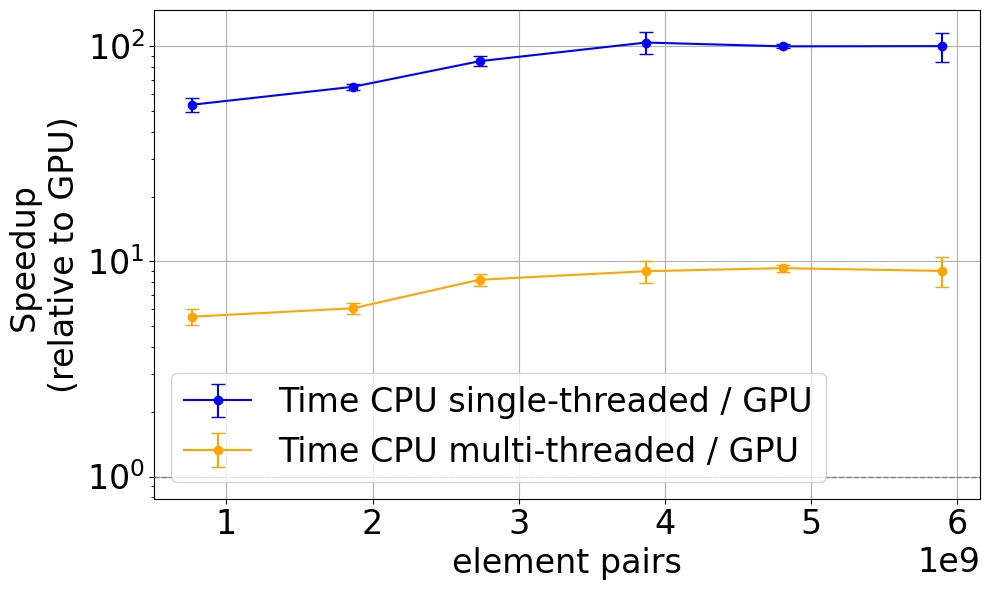

In [5]:

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(
    intgral_list, speedup_CPU_single_vs_GPU_sortCPU, yerr=error_CPU_single_vs_GPU_sortCPU,
    marker='o', label='Time CPU single-threaded / GPU', color='blue', capsize=5, linestyle='-'
)

ax.errorbar(
    intgral_list, speedup_CPU_multi_vs_GPU_sortCPU, yerr=error_CPU_multi_vs_GPU_sortCPU,
    marker='o', label='Time CPU multi-threaded / GPU', color='orange', capsize=5, linestyle='-'
)

ax.set_xlabel('element pairs', fontsize=size_plot)
ax.set_ylabel('Speedup \n(relative to GPU)', fontsize=size_plot)
ax.tick_params(axis='both', labelsize=size_plot)
ax.grid(True)

# Optional log scale if values vary widely
ax.set_yscale('log')


offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

# Optional horizontal line at y=1 (parity with GPU)
ax.axhline(1, color='gray', linestyle='--', linewidth=1)

ax.legend(fontsize=size_plot)
plt.tight_layout()
plt.savefig("graphs/speedup_sortCPU.svg", format='svg')
plt.show()